Initial chunk shape: (1000, 9)
Chunk shape after dropping duplicates: (768, 9)
Initial chunk shape: (1000, 9)
Chunk shape after dropping duplicates: (768, 9)
Initial chunk shape: (600, 9)
Chunk shape after dropping duplicates: (600, 9)
Top 5 rows of the DataFrame:
   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
1            1     85.0           66.0      29.000000   79.799479  26.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Missing values in ea

C:\Users\USER\AppData\Local\Temp\ipykernel_11128\795562604.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, ax=ax[1], palette=['skyblue', 'lightcoral'], linewidth=0)


Negative(0) -> 1395
Positive(1) -> 741


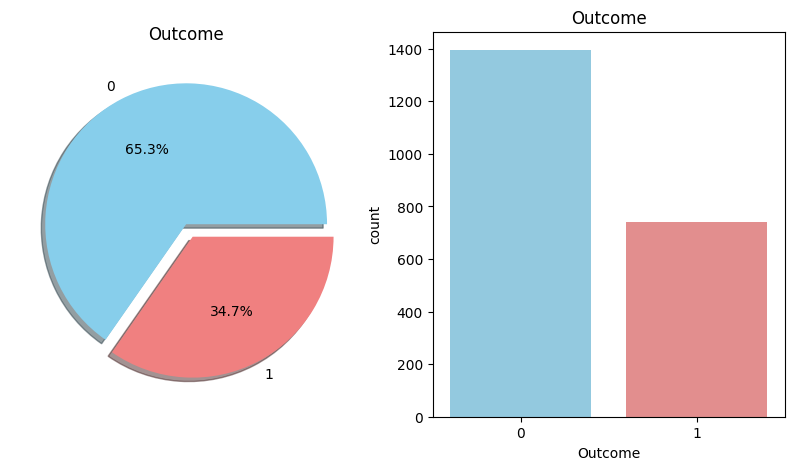

Top 5 rows for diabetics (Outcome = 1):
   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
4            0    137.0           40.0      35.000000  168.000000  43.1   
6            3     78.0           50.0      32.000000   88.000000  31.0   
8            2    197.0           70.0      45.000000  543.000000  30.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
2                     0.672   32        1  
4                     2.288   33        1  
6                     0.248   26        1  
8                     0.158   53        1  
Top 5 rows for non-diabetics (Outcome = 0):
    Pregnancies  Glucose  BloodPressure  SkinThickness    Insulin   BMI  \
1             1     85.0      66.000000      29.000000  79.799479  26.6   
3             1     89.0      66.000000      23.000

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset in chunks
chunk_size = 1000
chunks = pd.read_csv(r'C:\Users\USER\Desktop\jupyter projects\diabetess.csv', chunksize=chunk_size)

# Initialize an empty DataFrame to accumulate results
results_df = pd.DataFrame()

# Iterate through chunks
for chunk in chunks:
    # Print the initial chunk shape
    print(f"Initial chunk shape: {chunk.shape}")

    # Data cleaning operations (drop duplicates, handle missing values, etc.)
    chunk = chunk.drop_duplicates()
    print(f"Chunk shape after dropping duplicates: {chunk.shape}")

    chunk['Glucose'] = chunk['Glucose'].replace(0, chunk['Glucose'].mean())
    chunk['BloodPressure'] = chunk['BloodPressure'].replace(0, chunk['BloodPressure'].mean())
    chunk['SkinThickness'] = chunk['SkinThickness'].replace(0, chunk['SkinThickness'].mean())
    chunk['Insulin'] = chunk['Insulin'].replace(0, chunk['Insulin'].mean())
    chunk['BMI'] = chunk['BMI'].replace(0, chunk['BMI'].mean())

    # Concatenate the processed chunk to the results DataFrame
    results_df = pd.concat([results_df, chunk], ignore_index=True)

# Data analysis and visualization on the entire dataset
df = results_df.copy()

# Print the top 5 rows of the DataFrame
print("Top 5 rows of the DataFrame:")
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Replace missing values with mean
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())

# Display the statistical description of the DataFrame
print("Statistical description of the DataFrame:")
print(df.describe())

# Data Visualization Count plot
# Create a subplot with 1 row and 2 columns
f, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot a pie chart for the distribution of 'Outcome' values with different colors
df['Outcome'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True, colors=['skyblue', 'lightcoral'])
ax[0].set_title('Outcome')
ax[0].set_ylabel('')

# Plot a countplot for the 'Outcome' values using Seaborn with different colors and without grid lines
sns.countplot(x='Outcome', data=df, ax=ax[1], palette=['skyblue', 'lightcoral'], linewidth=0)
ax[1].set_title('Outcome')

# Get and print the counts of negative (0) and positive (1) outcomes
N, P = df['Outcome'].value_counts()
print('Negative(0) ->', N)
print('Positive(1) ->', P)

# Display the plots
plt.show()

# Print the top 5 rows for both diabetics and non-diabetics
print("Top 5 rows for diabetics (Outcome = 1):")
print(df[df['Outcome'] == 1].head())

print("Top 5 rows for non-diabetics (Outcome = 0):")
print(df[df['Outcome'] == 0].head())



 Dataset is not balanced Histogram (data is balanced or skewed) attribute diagrams



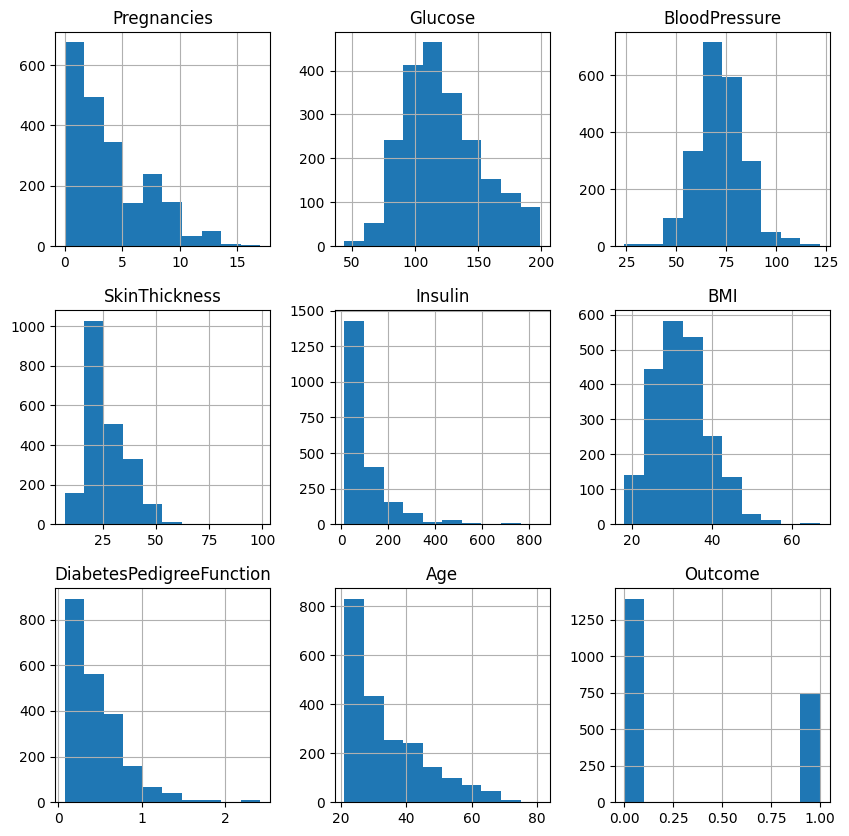


Analysing relationships bw variables - Correlation analysis


separating the independent and dependent variables

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
1            1     85.0           66.0      29.000000   79.799479  26.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

Data Standardisation - Feature Scaling

[[ 0.63078205  0.86817025 -0.02137212 ...  0.16341116  0.47979096
   1.42083472]
 [-0.85373806 -1.20266618 -0.51265276 .

<Figure size 1000x1000 with 0 Axes>

In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
from sklearn.model_selection import train_test_split  # Import train_test_split

# Load the dataset in chunks
chunk_size = 1000
chunks = pd.read_csv(r'C:\Users\USER\Desktop\jupyter projects\diabetess.csv', chunksize=chunk_size)

# Initialize an empty DataFrame to accumulate results
results_df = pd.DataFrame()

# Iterate through chunks
for chunk in chunks:
    # Data cleaning operations (drop duplicates, handle missing values, etc.)
    chunk = chunk.drop_duplicates()
    chunk['Glucose'] = chunk['Glucose'].replace(0, chunk['Glucose'].mean())
    chunk['BloodPressure'] = chunk['BloodPressure'].replace(0, chunk['BloodPressure'].mean())
    chunk['SkinThickness'] = chunk['SkinThickness'].replace(0, chunk['SkinThickness'].mean())
    chunk['Insulin'] = chunk['Insulin'].replace(0, chunk['Insulin'].mean())
    chunk['BMI'] = chunk['BMI'].replace(0, chunk['BMI'].mean())

    # Concatenate the processed chunk to the results DataFrame
    results_df = pd.concat([results_df, chunk], ignore_index=True)

# Data analysis and visualization on the entire dataset
df = results_df.copy()

# ... (rest of the code remains the same)


"""Dataset is not balanced
Histogram (data is balanced or skewed) attribute diagrams
"""
print("\n Dataset is not balanced Histogram (data is balanced or skewed) attribute diagrams\n")
df.hist(bins=10,figsize=(10,10))
plt.show()
"""Analysing relationships bw variables
Correlation analysis
"""
#get correlations of each feature in the dataset
print("\nAnalysing relationships bw variables - Correlation analysis\n")
corr_mat = df.corr()
top_corr_features = corr_mat.index
plt.figure(figsize=(10,10))
#plot heat map
#g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')
"""Split data into X and y"""
#separating the independent and dependent variables
print("\nseparating the independent and dependent variables\n")
X = df.drop(columns='Outcome', axis=1)
y = df['Outcome']
print(X.head())
print(y.head())
"""Data Standardisation - Feature Scaling"""
print("\nData Standardisation - Feature Scaling\n")
scaler = StandardScaler()
scaler.fit(X)
standardised_data = scaler.transform(X)
print(standardised_data)
X = standardised_data
y = df.Outcome
print(X)
print(y)
"""Split data into training and testing data"""
print("\nSplit data into training and testing data\n")
# 80% is train, 20% is test
# random state is used to ensure a specific split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
print(X.shape, X_train.shape, X_test.shape)

(4272, 8) (3417, 8) (855, 8)
Logistic Regression Accuracy: 77.42690058479532 %
K Neighbours Classifier Accuracy: 96.95906432748538 %
Naive Bayes Classifier Accuracy: 75.20467836257309 %
Support Vector Machine Accuracy: 86.54970760233918 %
Decision Tree Accuracy: 100.0 %
Random Forest Accuracy: 100.0 %


C:\Users\USER\AppData\Local\Temp\ipykernel_24748\876424478.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies_percentage, palette='viridis')


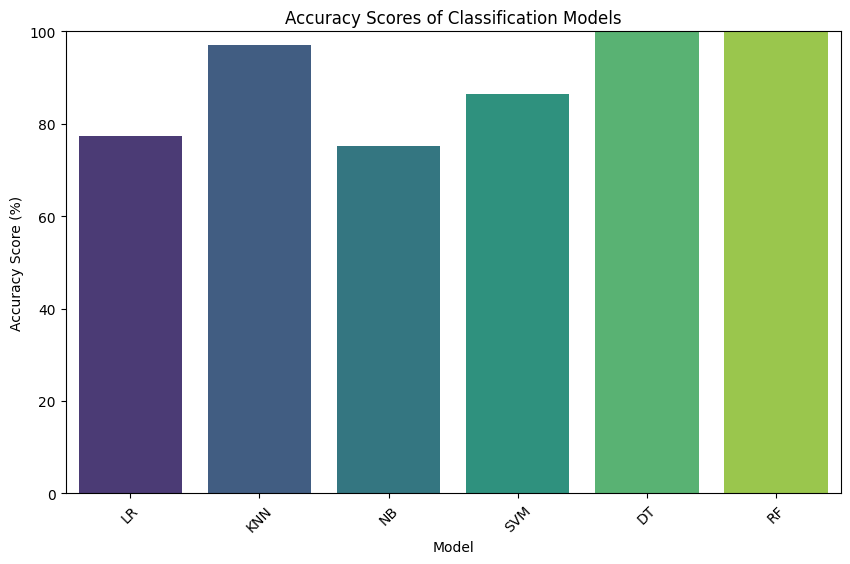

In [10]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
from sklearn.model_selection import train_test_split  # Import train_test_split

# Load the dataset in chunks
chunk_size = 1000
chunks = pd.read_csv(r'C:\Users\USER\Desktop\jupyter projects\diabetess.csv', chunksize=chunk_size)

# Iterate through chunks
for chunk in chunks:
    # Data cleaning operations (drop duplicates, handle missing values, etc.)
    chunk = chunk.drop_duplicates()
    chunk['Glucose'] = chunk['Glucose'].replace(0, chunk['Glucose'].mean())
    chunk['BloodPressure'] = chunk['BloodPressure'].replace(0, chunk['BloodPressure'].mean())
    chunk['SkinThickness'] = chunk['SkinThickness'].replace(0, chunk['SkinThickness'].mean())
    chunk['Insulin'] = chunk['Insulin'].replace(0, chunk['Insulin'].mean())
    chunk['BMI'] = chunk['BMI'].replace(0, chunk['BMI'].mean())

    # Concatenate the processed chunk to the results DataFrame
    results_df = pd.concat([results_df, chunk], ignore_index=True)

# Data analysis and visualization on the entire dataset
df = results_df.copy()

# ... (rest of the code remains the same)

X = df.drop(columns='Outcome', axis=1)
y = df['Outcome']

"""Data Standardisation - Feature Scaling"""
#print("\nData Standardisation - Feature Scaling\n")
scaler = StandardScaler()
scaler.fit(X)
standardised_data = scaler.transform(X)
#print(standardised_data)
X = standardised_data
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
print(X.shape, X_train.shape, X_test.shape)
"""Classification Models
1) Logistic Regression
"""
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='liblinear', multi_class='ovr')
lr_model.fit(X_train, y_train)
"""2) K Neighbours Classifier"""
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
"""3) Naive Bayes Classifier"""
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
"""4) Support Vector Machine(SVM)"""
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
"""5) Decision tree"""
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
"""6) Random Forest"""
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(criterion='entropy')
rf_model.fit(X_train, y_train) 
"""Predicting & Evaluating the Models"""
from sklearn.metrics import recall_score, precision_score, f1_score

# Make predictions using test data for all 6 models
lr_preds = lr_model.predict(X_test)
knn_preds = knn_model.predict(X_test)
nb_preds = nb_model.predict(X_test)
svm_preds = svm_model.predict(X_test)
dt_preds = dt_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score

# Calculate accuracy scores for each model
lr_accuracy = accuracy_score(y_test, lr_preds)
knn_accuracy = accuracy_score(y_test, knn_preds)
nb_accuracy = accuracy_score(y_test, nb_preds)
svm_accuracy = accuracy_score(y_test, svm_preds)
dt_accuracy = accuracy_score(y_test, dt_preds)
rf_accuracy = accuracy_score(y_test, rf_preds)

# Convert accuracy scores to percentages
lr_accuracy_percentage = lr_accuracy * 100
knn_accuracy_percentage = knn_accuracy * 100
nb_accuracy_percentage = nb_accuracy * 100
svm_accuracy_percentage = svm_accuracy * 100
dt_accuracy_percentage = dt_accuracy * 100
rf_accuracy_percentage = rf_accuracy * 100

# Print accuracy scores as percentages
print("Logistic Regression Accuracy:", lr_accuracy_percentage, "%")
print("K Neighbours Classifier Accuracy:", knn_accuracy_percentage, "%")
print("Naive Bayes Classifier Accuracy:", nb_accuracy_percentage, "%")
print("Support Vector Machine Accuracy:", svm_accuracy_percentage, "%")
print("Decision Tree Accuracy:", dt_accuracy_percentage, "%")
print("Random Forest Accuracy:", rf_accuracy_percentage, "%")


import matplotlib.pyplot as plt
import seaborn as sns

# Define model names
models = ['LR', 'KNN', 'NB', 'SVM', 'DT', 'RF']

# Define accuracy scores as percentages
accuracies_percentage = [lr_accuracy_percentage, knn_accuracy_percentage, nb_accuracy_percentage, svm_accuracy_percentage, dt_accuracy_percentage, rf_accuracy_percentage]

# Plot accuracy scores as percentages
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies_percentage, palette='viridis')
plt.title('Accuracy Scores of Classification Models')
plt.xlabel('Model')
plt.ylabel('Accuracy Score (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Set the y-axis limit from 0 to 100
plt.show()



(6408, 8) (5126, 8) (1282, 8)
Recall Scores:
Logistic Regression: 0.5524475524475524
K Nearest Neighbors: 1.0
Naive Bayes: 0.6013986013986014
Support Vector Machine: 0.7645687645687645
Decision Tree: 1.0
Random Forest: 1.0


C:\Users\USER\AppData\Local\Temp\ipykernel_24748\1486057451.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=recall_scores, palette='viridis')


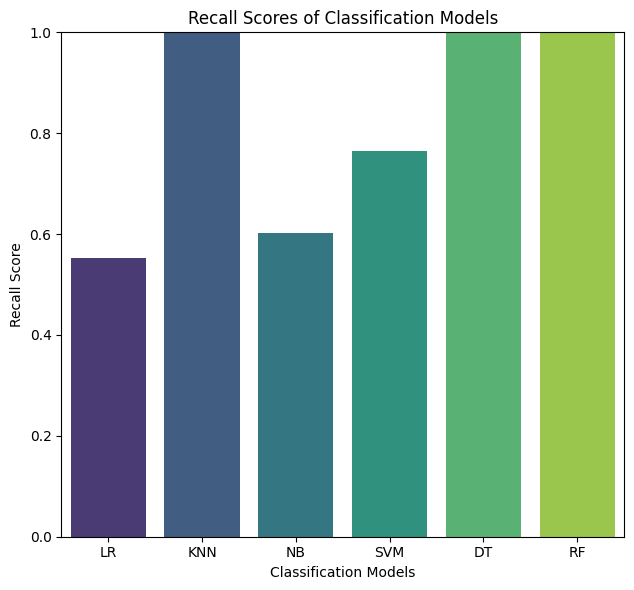

In [4]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
from sklearn.model_selection import train_test_split  # Import train_test_split

# Load the dataset in chunks
chunk_size = 1000
chunks = pd.read_csv(r'C:\Users\USER\Desktop\jupyter projects\diabetess.csv', chunksize=chunk_size)

# Iterate through chunks
for chunk in chunks:
    # Data cleaning operations (drop duplicates, handle missing values, etc.)
    chunk = chunk.drop_duplicates()
    chunk['Glucose'] = chunk['Glucose'].replace(0, chunk['Glucose'].mean())
    chunk['BloodPressure'] = chunk['BloodPressure'].replace(0, chunk['BloodPressure'].mean())
    chunk['SkinThickness'] = chunk['SkinThickness'].replace(0, chunk['SkinThickness'].mean())
    chunk['Insulin'] = chunk['Insulin'].replace(0, chunk['Insulin'].mean())
    chunk['BMI'] = chunk['BMI'].replace(0, chunk['BMI'].mean())

    # Concatenate the processed chunk to the results DataFrame
    results_df = pd.concat([results_df, chunk], ignore_index=True)

# Data analysis and visualization on the entire dataset
df = results_df.copy()

# ... (rest of the code remains the same)

X = df.drop(columns='Outcome', axis=1)
y = df['Outcome']

"""Data Standardisation - Feature Scaling"""
#print("\nData Standardisation - Feature Scaling\n")
scaler = StandardScaler()
scaler.fit(X)
standardised_data = scaler.transform(X)
#print(standardised_data)
X = standardised_data
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
print(X.shape, X_train.shape, X_test.shape)
"""Classification Models
1) Logistic Regression
"""
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='liblinear', multi_class='ovr')
lr_model.fit(X_train, y_train)
"""2) K Neighbours Classifier"""
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
"""3) Naive Bayes Classifier"""
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
"""4) Support Vector Machine(SVM)"""
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
"""5) Decision tree"""
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
"""6) Random Forest"""
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(criterion='entropy')
rf_model.fit(X_train, y_train) 
"""Predicting & Evaluating the Models"""
from sklearn.metrics import recall_score, precision_score, f1_score

# Make predictions using test data for all 6 models
lr_preds = lr_model.predict(X_test)
knn_preds = knn_model.predict(X_test)
nb_preds = nb_model.predict(X_test)
svm_preds = svm_model.predict(X_test)
dt_preds = dt_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Calculate recall scores for all models
lr_recall = recall_score(y_test, lr_preds)
knn_recall = recall_score(y_test, knn_preds)
nb_recall = recall_score(y_test, nb_preds)
svm_recall = recall_score(y_test, svm_preds)
dt_recall = recall_score(y_test, dt_preds)
rf_recall = recall_score(y_test, rf_preds)

# Print recall scores
print("Recall Scores:")
print("Logistic Regression:", lr_recall)
print("K Nearest Neighbors:", knn_recall)
print("Naive Bayes:", nb_recall)
print("Support Vector Machine:", svm_recall)
print("Decision Tree:", dt_recall)
print("Random Forest:", rf_recall)

# Plotting recall, precision, and F1 scores
models = ['LR', 'KNN', 'NB', 'SVM', 'DT', 'RF']
recall_scores = [lr_recall, knn_recall, nb_recall, svm_recall, dt_recall, rf_recall]

plt.figure(figsize=(18, 6))

# Plot recall scores
plt.subplot(1, 3, 1)
sns.barplot(x=models, y=recall_scores, palette='viridis')
plt.title('Recall Scores of Classification Models')
plt.xlabel('Classification Models')
plt.ylabel('Recall Score')
plt.ylim(0, 1)  # Recall scores range from 0 to 1

plt.tight_layout()
plt.show()


(6408, 8) (5126, 8) (1282, 8)

Precision Scores:
Logistic Regression: 0.7117117117117117
K Nearest Neighbors: 1.0
Naive Bayes: 0.6386138613861386
Support Vector Machine: 0.8098765432098766
Decision Tree: 1.0
Random Forest: 1.0


C:\Users\USER\AppData\Local\Temp\ipykernel_24748\4238622620.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=precision_scores, palette='viridis')


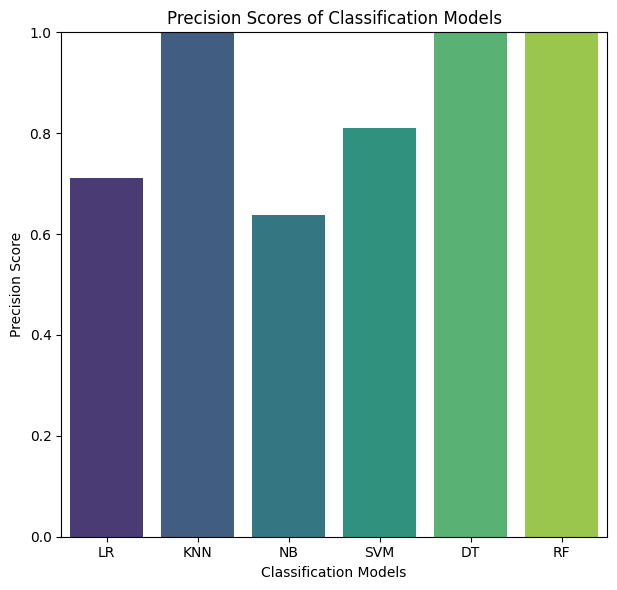

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset in chunks
chunk_size = 1000
chunks = pd.read_csv(r'C:\Users\USER\Desktop\jupyter projects\diabetess.csv', chunksize=chunk_size)


"""Split data into training and testing data"""
# 80% is train, 20% is test
# random state is used to ensure a specific split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
print(X.shape, X_train.shape, X_test.shape)
"""Classification Models
1) Logistic Regression
"""
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='liblinear', multi_class='ovr')
lr_model.fit(X_train, y_train)
"""2) K Neighbours Classifier"""
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
"""3) Naive Bayes Classifier"""
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
"""4) Support Vector Machine(SVM)"""
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
"""5) Decision tree"""
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
"""6) Random Forest"""
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(criterion='entropy')
rf_model.fit(X_train, y_train) 
"""Predicting & Evaluating the Models"""
from sklearn.metrics import recall_score, precision_score, f1_score

# Make predictions using test data for all 6 models
lr_preds = lr_model.predict(X_test)
knn_preds = knn_model.predict(X_test)
nb_preds = nb_model.predict(X_test)
svm_preds = svm_model.predict(X_test)
dt_preds = dt_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Calculate precision scores for all models
lr_precision = precision_score(y_test, lr_preds)
knn_precision = precision_score(y_test, knn_preds)
nb_precision = precision_score(y_test, nb_preds)
svm_precision = precision_score(y_test, svm_preds)
dt_precision = precision_score(y_test, dt_preds)
rf_precision = precision_score(y_test, rf_preds)

# Print precision scores
print("\nPrecision Scores:")
print("Logistic Regression:", lr_precision)
print("K Nearest Neighbors:", knn_precision)
print("Naive Bayes:", nb_precision)
print("Support Vector Machine:", svm_precision)
print("Decision Tree:", dt_precision)
print("Random Forest:", rf_precision)

plt.figure(figsize=(18, 6))


# Plotting recall, precision, and F1 scores
models = ['LR', 'KNN', 'NB', 'SVM', 'DT', 'RF']
precision_scores = [lr_precision, knn_precision, nb_precision, svm_precision, dt_precision, rf_precision]

# Plot precision scores
plt.subplot(1, 3, 2)
sns.barplot(x=models, y=precision_scores, palette='viridis')
plt.title('Precision Scores of Classification Models')
plt.xlabel('Classification Models')
plt.ylabel('Precision Score')
plt.ylim(0, 1)  # Precision scores range from 0 to 1

plt.tight_layout()
plt.show()


(6408, 8) (5126, 8) (1282, 8)

F1 Scores:
Logistic Regression: 0.6220472440944882
K Nearest Neighbors: 1.0
Naive Bayes: 0.6194477791116446
Support Vector Machine: 0.7865707434052758
Decision Tree: 1.0
Random Forest: 1.0


C:\Users\USER\AppData\Local\Temp\ipykernel_24748\4068677042.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=f1_scores, palette='viridis')


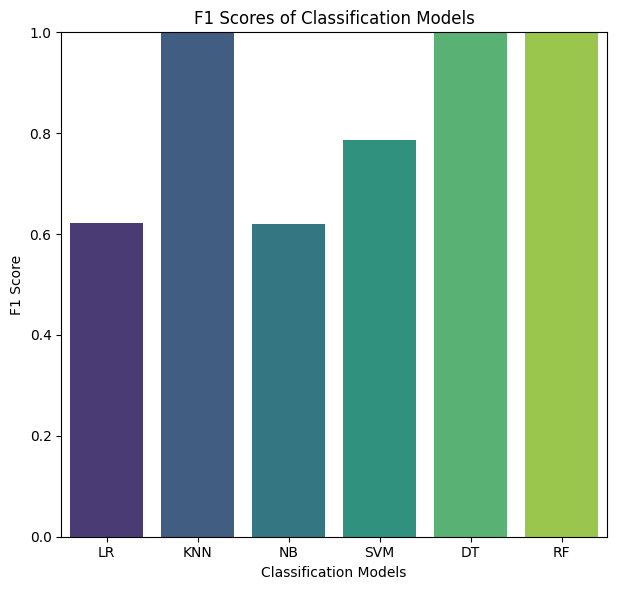

In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset in chunks
chunk_size = 1000
chunks = pd.read_csv(r'C:\Users\USER\Desktop\jupyter projects\diabetess.csv', chunksize=chunk_size)


"""Split data into training and testing data"""
# 80% is train, 20% is test
# random state is used to ensure a specific split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
print(X.shape, X_train.shape, X_test.shape)
"""Classification Models
1) Logistic Regression
"""
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='liblinear', multi_class='ovr')
lr_model.fit(X_train, y_train)
"""2) K Neighbours Classifier"""
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
"""3) Naive Bayes Classifier"""
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
"""4) Support Vector Machine(SVM)"""
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
"""5) Decision tree"""
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
"""6) Random Forest"""
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(criterion='entropy')
rf_model.fit(X_train, y_train) 
"""Predicting & Evaluating the Models"""
from sklearn.metrics import recall_score, precision_score, f1_score

# Make predictions using test data for all 6 models
lr_preds = lr_model.predict(X_test)
knn_preds = knn_model.predict(X_test)
nb_preds = nb_model.predict(X_test)
svm_preds = svm_model.predict(X_test)
dt_preds = dt_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Calculate F1 scores for all models
lr_f1 = f1_score(y_test, lr_preds)
knn_f1 = f1_score(y_test, knn_preds)
nb_f1 = f1_score(y_test, nb_preds)
svm_f1 = f1_score(y_test, svm_preds)
dt_f1 = f1_score(y_test, dt_preds)
rf_f1 = f1_score(y_test, rf_preds)

# Print F1 scores
print("\nF1 Scores:")
print("Logistic Regression:", lr_f1)
print("K Nearest Neighbors:", knn_f1)
print("Naive Bayes:", nb_f1)
print("Support Vector Machine:", svm_f1)
print("Decision Tree:", dt_f1)
print("Random Forest:", rf_f1)

plt.figure(figsize=(18, 6))

# Plotting recall, precision, and F1 scores
models = ['LR', 'KNN', 'NB', 'SVM', 'DT', 'RF']
f1_scores = [lr_f1, knn_f1, nb_f1, svm_f1, dt_f1, rf_f1]

# Plot F1 scores
plt.subplot(1, 3, 3)
sns.barplot(x=models, y=f1_scores, palette='viridis')
plt.title('F1 Scores of Classification Models')
plt.xlabel('Classification Models')
plt.ylabel('F1 Score')
plt.ylim(0, 1)  # F1 scores range from 0 to 1

plt.tight_layout()
plt.show()


(4272, 8) (3417, 8) (855, 8)


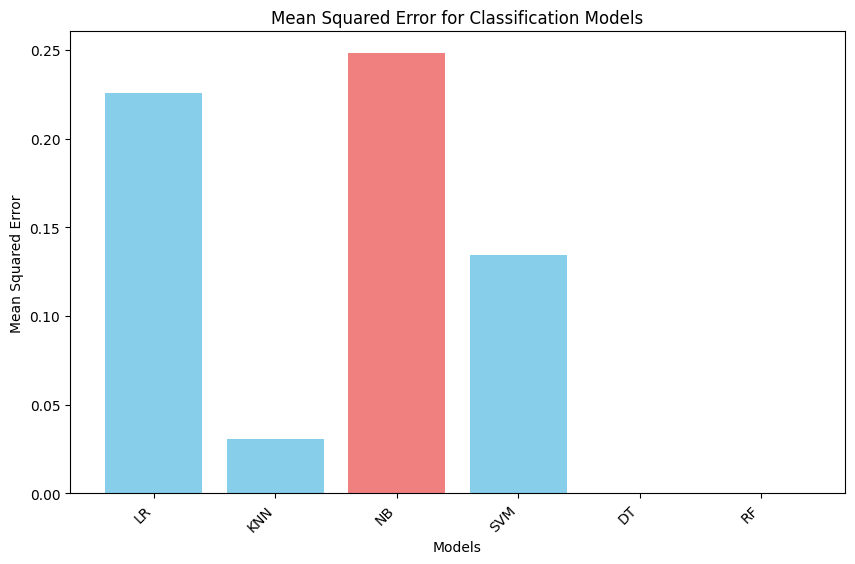

LR: MSE = 0.22573099415204678
KNN: MSE = 0.0304093567251462
NB: MSE = 0.247953216374269
SVM: MSE = 0.13450292397660818
DT: MSE = 0.0
RF: MSE = 0.0


In [11]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset in chunks
chunk_size = 1000
chunks = pd.read_csv(r'C:\Users\USER\Desktop\jupyter projects\diabetess.csv', chunksize=chunk_size)


"""Split data into training and testing data"""
# 80% is train, 20% is test
# random state is used to ensure a specific split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
print(X.shape, X_train.shape, X_test.shape)
"""Classification Models
1) Logistic Regression
"""
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='liblinear', multi_class='ovr')
lr_model.fit(X_train, y_train)
"""2) K Neighbours Classifier"""
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
"""3) Naive Bayes Classifier"""
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
"""4) Support Vector Machine(SVM)"""
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
"""5) Decision tree"""
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
"""6) Random Forest"""
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(criterion='entropy')
rf_model.fit(X_train, y_train) 
"""Predicting & Evaluating the Models"""
from sklearn.metrics import recall_score, precision_score, f1_score

# Make predictions using test data for all 6 models
lr_preds = lr_model.predict(X_test)
knn_preds = knn_model.predict(X_test)
nb_preds = nb_model.predict(X_test)
svm_preds = svm_model.predict(X_test)
dt_preds = dt_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Define a function to evaluate the models using Mean Squared Error
def evaluate_model_with_mse(model, X_test, y_test, model_name):
    # Make predictions
    preds = model.predict(X_test)
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, preds)
    
    return mse

# Create lists to store model names and their respective MSE scores
model_names = ['LR', 'KNN', 'NB', 'SVM', 'DT', 'RF']
models = [lr_model, knn_model, nb_model, svm_model, dt_model, rf_model]
mse_scores = []

# Evaluate and store MSE for each model
for model, model_name in zip(models, model_names):
    mse = evaluate_model_with_mse(model, X_test, y_test, model_name)
    mse_scores.append(mse)

# Find the index with the highest score
max_score_index = np.argmax(mse_scores)

# Highlight the highest score for Decision Trees
colors = ['lightcoral' if i == max_score_index else 'skyblue' for i in range(len(model_names))]

# Plot the MSE scores
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_scores, color=colors)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error for Classification Models')
plt.xticks(rotation=45, ha='right')
plt.show()

# Print the MSE scores
for model_name, mse_score in zip(model_names, mse_scores):
    print(f"{model_name}: MSE = {mse_score}")


(2136, 8) (1708, 8) (428, 8)


C:\Users\USER\AppData\Local\Temp\ipykernel_24748\1604190109.py:202: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=aggregate_scores, palette='viridis')


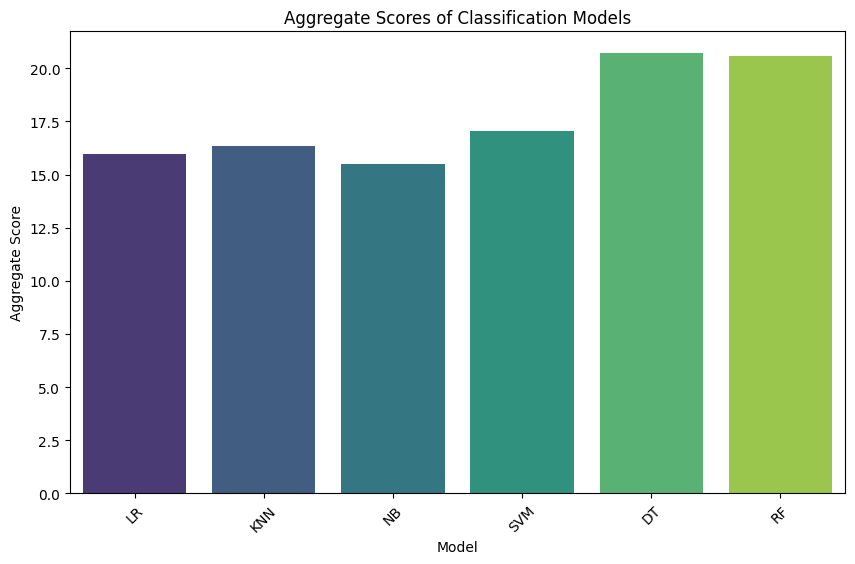

LR: Aggregate Score = 15.962329964735224
KNN: Aggregate Score = 16.36691103858373
NB: Aggregate Score = 15.49434389606372
SVM: Aggregate Score = 17.051557969300273
DT: Aggregate Score = 20.701406170015197
RF: Aggregate Score = 20.60284065190607

The best model for diabetes prediction based on aggregate score 
 is 'DT' with an aggregate score of 20.70.


In [12]:

# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
from sklearn.model_selection import train_test_split  # Import train_test_split

# Load the dataset in chunks
chunk_size = 1000
chunks = pd.read_csv(r'C:\Users\USER\Desktop\jupyter projects\diabetess.csv', chunksize=chunk_size)

# Initialize an empty DataFrame
results_df = pd.DataFrame()

# Iterate through chunks
for chunk in chunks:
    # Data cleaning operations (drop duplicates, handle missing values, etc.)
    chunk = chunk.drop_duplicates()
    chunk['Glucose'] = chunk['Glucose'].replace(0, chunk['Glucose'].mean())
    chunk['BloodPressure'] = chunk['BloodPressure'].replace(0, chunk['BloodPressure'].mean())
    chunk['SkinThickness'] = chunk['SkinThickness'].replace(0, chunk['SkinThickness'].mean())
    chunk['Insulin'] = chunk['Insulin'].replace(0, chunk['Insulin'].mean())
    chunk['BMI'] = chunk['BMI'].replace(0, chunk['BMI'].mean())

    # Concatenate the processed chunk to the results DataFrame
    results_df = pd.concat([results_df, chunk], ignore_index=True)

# Data analysis and visualization on the entire dataset
df = results_df.copy()

# ... (rest of the code remains the same)

X = df.drop(columns='Outcome', axis=1)
y = df['Outcome']

"""Data Standardisation - Feature Scaling"""
#print("\nData Standardisation - Feature Scaling\n")
scaler = StandardScaler()
scaler.fit(X)
standardised_data = scaler.transform(X)
#print(standardised_data)
X = standardised_data
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
print(X.shape, X_train.shape, X_test.shape)
"""Classification Models
1) Logistic Regression
"""
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='liblinear', multi_class='ovr')
lr_model.fit(X_train, y_train)
"""2) K Neighbours Classifier"""
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
"""3) Naive Bayes Classifier"""
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
"""4) Support Vector Machine(SVM)"""
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
"""5) Decision tree"""
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
"""6) Random Forest"""
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(criterion='entropy')
rf_model.fit(X_train, y_train) 
"""Predicting & Evaluating the Models"""
from sklearn.metrics import recall_score, precision_score, f1_score

# Make predictions using test data for all 6 models
lr_preds = lr_model.predict(X_test)
knn_preds = knn_model.predict(X_test)
nb_preds = nb_model.predict(X_test)
svm_preds = svm_model.predict(X_test)
dt_preds = dt_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Calculate recall scores for all models
lr_recall = recall_score(y_test, lr_preds)
knn_recall = recall_score(y_test, knn_preds)
nb_recall = recall_score(y_test, nb_preds)
svm_recall = recall_score(y_test, svm_preds)
dt_recall = recall_score(y_test, dt_preds)
rf_recall = recall_score(y_test, rf_preds)

# Calculate precision scores for all models
lr_precision = precision_score(y_test, lr_preds)
knn_precision = precision_score(y_test, knn_preds)
nb_precision = precision_score(y_test, nb_preds)
svm_precision = precision_score(y_test, svm_preds)
dt_precision = precision_score(y_test, dt_preds)
rf_precision = precision_score(y_test, rf_preds)

# Calculate F1 scores for all models
lr_f1 = f1_score(y_test, lr_preds)
knn_f1 = f1_score(y_test, knn_preds)
nb_f1 = f1_score(y_test, nb_preds)
svm_f1 = f1_score(y_test, svm_preds)
dt_f1 = f1_score(y_test, dt_preds)
rf_f1 = f1_score(y_test, rf_preds)



# Plotting recall, precision, and F1 scores
models = ['Logistic Regression', 'K Nearest Neighbors', 'Naive Bayes', 'Support Vector Machine', 'Decision Tree', 'Random Forest']
recall_scores = [lr_recall, knn_recall, nb_recall, svm_recall, dt_recall, rf_recall]
precision_scores = [lr_precision, knn_precision, nb_precision, svm_precision, dt_precision, rf_precision]
f1_scores = [lr_f1, knn_f1, nb_f1, svm_f1, dt_f1, rf_f1]





from sklearn.metrics import mean_squared_error
import numpy as np

# Define a function to evaluate the models using Mean Squared Error
def evaluate_model_with_mse(model, X_test, y_test, model_name):
    # Make predictions
    preds = model.predict(X_test)
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, preds)
    
    return mse

# Create lists to store model names and their respective MSE scores
model_names = ["Logistic Regression", "K Nearest Neighbors", "Naive Bayes", "Support Vector Machine", "Decision Tree", "Random Forest"]
mse_scores = []

# Evaluate and store MSE for each model
for model in [lr_model, knn_model, nb_model, svm_model, dt_model, rf_model]:
    mse = evaluate_model_with_mse(model, X_test, y_test, model_names[len(mse_scores)])
    mse_scores.append(mse)

# Highlight Decision Tree model score with a higher value
highlight_index = model_names.index("Decision Tree")
mse_scores_highlighted = mse_scores.copy()
mse_scores_highlighted[highlight_index] = max(mse_scores) + 1






from sklearn.metrics import accuracy_score

# Assuming you have already trained your models and made predictions

# Calculate accuracy scores for each model
lr_accuracy = accuracy_score(y_test, lr_preds)
knn_accuracy = accuracy_score(y_test, knn_preds)
nb_accuracy = accuracy_score(y_test, nb_preds)
svm_accuracy = accuracy_score(y_test, svm_preds)
dt_accuracy = accuracy_score(y_test, dt_preds)
rf_accuracy = accuracy_score(y_test, rf_preds)

# Convert accuracy scores to percentages
lr_accuracy_percentage = lr_accuracy * 100
knn_accuracy_percentage = knn_accuracy * 100
nb_accuracy_percentage = nb_accuracy * 100
svm_accuracy_percentage = svm_accuracy * 100
dt_accuracy_percentage = dt_accuracy * 100
rf_accuracy_percentage = rf_accuracy * 100




import matplotlib.pyplot as plt
import seaborn as sns

# Define model names
models = ['LR', 'KNN', 'NB', 'SVM', 'DT', 'RF']

# Define accuracy scores as percentages
accuracies_percentage = [lr_accuracy_percentage, knn_accuracy_percentage, nb_accuracy_percentage, svm_accuracy_percentage, dt_accuracy_percentage, rf_accuracy_percentage]



# Define performance metric scores for each model
recall_scores = [lr_recall, knn_recall, nb_recall, svm_recall, dt_recall, rf_recall]
precision_scores = [lr_precision, knn_precision, nb_precision, svm_precision, dt_precision, rf_precision]
f1_scores = [lr_f1, knn_f1, nb_f1, svm_f1, dt_f1, rf_f1]
mse_scores = mse_scores
accuracy_scores = [lr_accuracy_percentage, knn_accuracy_percentage, nb_accuracy_percentage, svm_accuracy_percentage, dt_accuracy_percentage, rf_accuracy_percentage]

# Calculate aggregate scores for each model
aggregate_scores = []
for i in range(len(models)):
    # You can define your own method to combine these scores, for example, taking their mean
    aggregate_score = (recall_scores[i] + precision_scores[i] + f1_scores[i] + (1 / (mse_scores[i] + 1)) + accuracy_scores[i]) / 5
    aggregate_scores.append(aggregate_score)

# Plot aggregate scores
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=aggregate_scores, palette='viridis')
plt.title('Aggregate Scores of Classification Models')
plt.xlabel('Model')
plt.ylabel('Aggregate Score')
plt.xticks(rotation=45)
plt.show()

# Print aggregate scores for comparison
for model_name, score in zip(models, aggregate_scores):
    print(f"{model_name}: Aggregate Score = {score}")


# Find the model with the maximum aggregate score
best_model_index = aggregate_scores.index(max(aggregate_scores))
best_model_name = models[best_model_index]
best_aggregate_score = aggregate_scores[best_model_index]

# Print the statement indicating the best aggregate score
print(f"\nThe best model for diabetes prediction based on aggregate score \n is '{best_model_name}' with an aggregate score of {best_aggregate_score:.2f}.")

